In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten
from sklearn.utils import resample
import warnings 
warnings.filterwarnings(action = 'ignore')

In [16]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('../data/doc_train.csv')
df['clean_text'].fillna("No data", inplace = True)
df["new_token_words"].fillna("No data", inplace = True)

# TFID with features

In [13]:
train_size = int(df.shape[0] * 0.8)
train_index = np.arange(train_size)
train_df = df[df.index.isin(train_index)]
test_df = df[~df.index.isin(train_index)]
print(f'train_df.shape is : {train_df.shape}, test_df is : {test_df.shape}')

train_df.shape is : (202696, 26), test_df is : (50674, 26)


In [14]:
tf = TfidfVectorizer(max_features= 5000)
labels = df['Score'].astype(str).tolist()
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_df['Score'].astype(str).tolist()))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(test_df['Score'].astype(str).tolist()))

In [15]:
features = ['HelpfulnessNumerator', 'HelpfulnessDenominator','words_count', 'unique_words', 'polarity',
       'subjectivity']
#vectorize train words and then transform them & combine the matrix with the new features to create the train's final matrix
x_words_train = tf.fit_transform(train_df["clean_text"].values.ravel()).toarray()
x_train_matrix = np.concatenate((x_words_train, train_df[features].values), axis =1)
# transform test words from tfidf fitted by the train words & combine test matrix with test new features
x_words_test = tf.transform(test_df["clean_text"].values.ravel()).toarray()
x_test_matrix = np.concatenate((x_words_test, test_df[features].values), axis =1)

In [22]:
rf=RandomForestClassifier(n_estimators = 250, random_state = 42, max_features ='auto')

rf.fit(x_train_matrix, train_df['Score'].values)
y_hat = rf.predict(x_test_matrix)
test=pd.concat([test_df['Score'], pd.Series(y_hat, index = test_df.index)], axis = 1)
cm_mulit_com= confusion_matrix(test_df['Score'], y_hat)
print(cm_mulit_com)

[[ 3003     2     4     3  2041]
 [  274   955     9    14  1514]
 [  133     3  1442    31  2433]
 [   32     1     5  2586  4544]
 [   44     1     5    14 31581]]


In [20]:
confusion_matrix(test_df['Score'],y_hat)

array([[ 3003,     2,     4,     3,  2041],
       [  274,   955,     9,    14,  1514],
       [  133,     3,  1442,    31,  2433],
       [   32,     1,     5,  2586,  4544],
       [   44,     1,     5,    14, 31581]])

# ANN with 3 hidden layers

In [9]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = x_train_matrix.shape[1]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history_rnn = model.fit(x_train_matrix, training_label_seq, epochs=num_epochs, validation_data=(x_test_matrix, validation_label_seq), verbose=2)

Train on 202696 samples, validate on 50674 samples
Epoch 1/10
202696/202696 - 27s - loss: 0.8070 - accuracy: 0.6981 - val_loss: 0.7350 - val_accuracy: 0.7223
Epoch 2/10
202696/202696 - 26s - loss: 0.7184 - accuracy: 0.7269 - val_loss: 0.7014 - val_accuracy: 0.7350
Epoch 3/10
202696/202696 - 26s - loss: 0.6829 - accuracy: 0.7418 - val_loss: 0.7125 - val_accuracy: 0.7341
Epoch 4/10
202696/202696 - 26s - loss: 0.6527 - accuracy: 0.7540 - val_loss: 0.6734 - val_accuracy: 0.7502
Epoch 5/10
202696/202696 - 26s - loss: 0.6222 - accuracy: 0.7660 - val_loss: 0.6802 - val_accuracy: 0.7481
Epoch 6/10
202696/202696 - 27s - loss: 0.5914 - accuracy: 0.7778 - val_loss: 0.6784 - val_accuracy: 0.7559
Epoch 7/10
202696/202696 - 26s - loss: 0.5631 - accuracy: 0.7899 - val_loss: 0.6903 - val_accuracy: 0.7522
Epoch 8/10
202696/202696 - 26s - loss: 0.5366 - accuracy: 0.7999 - val_loss: 0.6777 - val_accuracy: 0.7590
Epoch 9/10
202696/202696 - 26s - loss: 0.5131 - accuracy: 0.8086 - val_loss: 0.6911 - val_acc

In [37]:
model1 = Sequential()
model1.add(Dense(512, activation = 'relu', input_dim = x_train_matrix.shape[1]))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(24, activation='relu'))
model1.add(Dense(6, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history_rnn_1 = model1.fit(x_train_matrix, training_label_seq, epochs=num_epochs, validation_data=(x_test_matrix, validation_label_seq), verbose=2)

Train on 202696 samples, validate on 50674 samples
Epoch 1/10
202696/202696 - 76s - loss: 0.8230 - accuracy: 0.6960 - val_loss: 0.7439 - val_accuracy: 0.7272
Epoch 2/10
202696/202696 - 76s - loss: 0.7193 - accuracy: 0.7276 - val_loss: 0.7127 - val_accuracy: 0.7283
Epoch 3/10
202696/202696 - 75s - loss: 0.6812 - accuracy: 0.7418 - val_loss: 0.7943 - val_accuracy: 0.6995
Epoch 4/10
202696/202696 - 74s - loss: 0.6428 - accuracy: 0.7571 - val_loss: 0.7267 - val_accuracy: 0.7396
Epoch 5/10
202696/202696 - 75s - loss: 0.6095 - accuracy: 0.7708 - val_loss: 0.6623 - val_accuracy: 0.7554
Epoch 6/10
202696/202696 - 78s - loss: 0.5722 - accuracy: 0.7850 - val_loss: 0.6797 - val_accuracy: 0.7556
Epoch 7/10
202696/202696 - 76s - loss: 0.5404 - accuracy: 0.7979 - val_loss: 0.6868 - val_accuracy: 0.7513
Epoch 8/10
202696/202696 - 75s - loss: 0.5094 - accuracy: 0.8096 - val_loss: 0.6974 - val_accuracy: 0.7609
Epoch 9/10
202696/202696 - 75s - loss: 0.4814 - accuracy: 0.8205 - val_loss: 0.7049 - val_acc

# ANN with 4 hidden layers

In [10]:
model2 = Sequential()
model2.add(Dense(256, activation = 'relu', input_dim = x_train_matrix.shape[1]))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(6, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history_rnn_2 = model2.fit(x_train_matrix, training_label_seq, epochs=num_epochs, validation_data=(x_test_matrix, validation_label_seq), verbose=2)

Train on 202696 samples, validate on 50674 samples
Epoch 1/10
202696/202696 - 48s - loss: 0.8183 - accuracy: 0.6953 - val_loss: 0.7226 - val_accuracy: 0.7252
Epoch 2/10
202696/202696 - 47s - loss: 0.7193 - accuracy: 0.7262 - val_loss: 0.7173 - val_accuracy: 0.7280
Epoch 3/10
202696/202696 - 48s - loss: 0.6830 - accuracy: 0.7406 - val_loss: 0.7726 - val_accuracy: 0.7295
Epoch 4/10
202696/202696 - 46s - loss: 0.6485 - accuracy: 0.7538 - val_loss: 0.6907 - val_accuracy: 0.7428
Epoch 5/10
202696/202696 - 46s - loss: 0.6148 - accuracy: 0.7676 - val_loss: 0.6871 - val_accuracy: 0.7452
Epoch 6/10
202696/202696 - 46s - loss: 0.5848 - accuracy: 0.7789 - val_loss: 0.6872 - val_accuracy: 0.7489
Epoch 7/10
202696/202696 - 45s - loss: 0.5578 - accuracy: 0.7890 - val_loss: 0.6982 - val_accuracy: 0.7476
Epoch 8/10
202696/202696 - 46s - loss: 0.5325 - accuracy: 0.7990 - val_loss: 0.7023 - val_accuracy: 0.7550
Epoch 9/10
202696/202696 - 47s - loss: 0.5063 - accuracy: 0.8089 - val_loss: 0.7197 - val_acc

In [24]:
tdif_ann= {'1_acc': history_rnn.history['val_accuracy'],
        '1_loss': history_rnn.history['val_loss'],
          '2_acc': history_rnn_2.history['val_accuracy'],
        '2_loss': history_rnn_2.history['val_loss']}
tdif_ann_df = pd.DataFrame(tdif_ann)

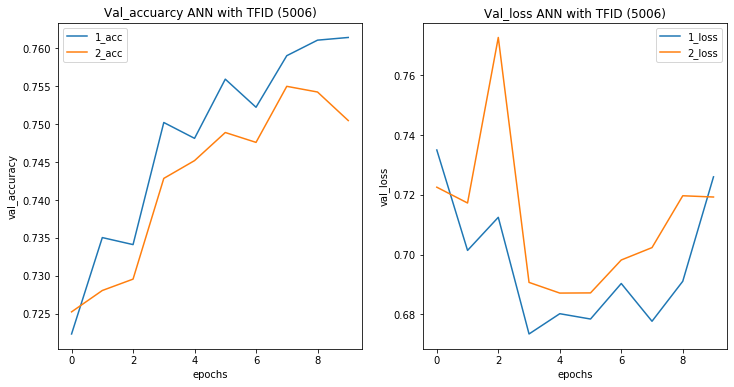

In [25]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
tdif_ann_df[['1_acc','2_acc']].plot(ax = axs[0])

axs[0].set_xlabel('epochs')
axs[0].set_ylabel('val_accuracy')

axs[0].set_title('Val_accuarcy ANN with TFID (5006)')
tdif_ann_df[['1_loss','2_loss']].plot(ax = axs[1])

axs[1].set_title('Val_loss ANN with TFID (5006)')
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('val_loss');

# Balanced Data

In [4]:
df_5 = df[df['Score'] == 5]
df_4 = df[df['Score'] == 4]
df_3 = df[df['Score'] == 3]
df_2 = df[df['Score'] == 2]
df_1 = df[df['Score'] == 1]

In [5]:
df_5_downsampled = resample(df_5, replace=False,    # sample without replacement
                            n_samples=14080,     # to match minority class
                            random_state=123)
df_4_downsampled = resample(df_4, replace=False,    # sample without replacement
                            n_samples=14080,     # to match minority class
                            random_state=123)
df_3_downsampled = resample(df_3, replace=False,    # sample without replacement
                            n_samples=14080,     # to match minority class
                            random_state=123)
df_1_downsampled = resample(df_1, replace=False,    # sample without replacement
                            n_samples=14080,     # to match minority class
                            random_state=123)

In [6]:
# Combine minority class with downsampled majority class
df_downsampled_mulit = pd.concat([df_5_downsampled, df_4_downsampled, df_3_downsampled,df_1_downsampled,df_2])
# Display new class counts
df_downsampled_mulit['Score'].value_counts()

5    14080
4    14080
3    14080
2    14080
1    14080
Name: Score, dtype: int64

In [7]:
train_size_b = int(df_downsampled_mulit.shape[0] * 0.8)
train_df_b = df_downsampled_mulit.iloc[:train_size_b,:]
test_df_b = df_downsampled_mulit.iloc[train_size_b:,:]
print(f'train_df.shape is : {train_df_b.shape}, test_df is : {test_df_b.shape}')

train_df.shape is : (56320, 26), test_df is : (14080, 26)


In [8]:
features = ['HelpfulnessNumerator', 'HelpfulnessDenominator','words_count', 'unique_words', 'polarity',
       'subjectivity', 'doc2vec_vector_0', 'doc2vec_vector_1',
       'doc2vec_vector_2', 'doc2vec_vector_3', 'doc2vec_vector_4']


tfidf_multi = TfidfVectorizer(max_features= 5000)

In [9]:
#vectorize train words and then transform them & combine the matrix with the new features to create the train's final matrix
x_words_train_b = tfidf_multi.fit_transform(train_df_b["clean_text"].values.ravel()).toarray()
x_train_matrix_b = np.concatenate((x_words_train_b, train_df_b[features].values), axis =1)

# transform test words from tfidf fitted by the train words & combine test matrix with test new features
x_words_test_b = tfidf_multi.transform(test_df_b["clean_text"].values.ravel()).toarray()
x_test_matrix_b = np.concatenate((x_words_test_b, test_df_b[features].values), axis =1)

In [10]:
labels = df_downsampled_mulit['Score'].astype(str).tolist()
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_df_b['Score'].astype(str).tolist()))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(test_df_b['Score'].astype(str).tolist()))

In [11]:
model1 = Sequential()
model1.add(Dense(512, activation = 'relu', input_dim = x_train_matrix_b.shape[1]))
model1.add(Dense(256, activation = 'relu'))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(24, activation='relu'))
model1.add(Dense(6, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 30
history_rnn1 = model1.fit(x_train_matrix_b, training_label_seq, epochs=num_epochs, validation_data=(x_test_matrix_b, validation_label_seq), verbose=2)

Train on 56320 samples, validate on 14080 samples
Epoch 1/30
56320/56320 - 23s - loss: 1.0971 - accuracy: 0.5038 - val_loss: 12.2885 - val_accuracy: 0.0000e+00
Epoch 2/30
56320/56320 - 21s - loss: 0.8678 - accuracy: 0.6237 - val_loss: 18.2853 - val_accuracy: 0.0000e+00
Epoch 3/30
56320/56320 - 20s - loss: 0.8067 - accuracy: 0.6529 - val_loss: 17.7380 - val_accuracy: 0.0000e+00
Epoch 4/30
56320/56320 - 21s - loss: 0.7700 - accuracy: 0.6709 - val_loss: 21.8387 - val_accuracy: 0.0000e+00
Epoch 5/30
56320/56320 - 20s - loss: 0.7296 - accuracy: 0.6921 - val_loss: 26.0671 - val_accuracy: 0.0000e+00
Epoch 6/30
56320/56320 - 20s - loss: 0.6820 - accuracy: 0.7157 - val_loss: 32.6666 - val_accuracy: 0.0000e+00
Epoch 7/30
56320/56320 - 20s - loss: 0.6408 - accuracy: 0.7344 - val_loss: 38.7700 - val_accuracy: 0.0000e+00
Epoch 8/30
56320/56320 - 20s - loss: 0.5892 - accuracy: 0.7563 - val_loss: 47.9506 - val_accuracy: 0.0000e+00
Epoch 9/30
56320/56320 - 20s - loss: 0.5439 - accuracy: 0.7761 - val_l